## A. Agenda: 
- 6:05 - 6:45 - lecture: Hyper parameter theory
- 6:45 - 7:30 - work time
- 7:30 - 8:15 - lecture: Feature importance
- 8:15 - 9 - work time

## B. Interesting links / Resources

Resources:
- [Slides for Bayesian method](http://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/slides/lec21.pdf)
- [Grid search overview](http://scikit-learn.org/stable/modules/grid_search.html)
- [website: cool optimization service](https://sigopt.com/pricing)

|    | Learning Objectives                                                                           |
| -- | --------------------------------------------------------------------------------------------- |
| A. | Have conceptual and practical understanding, be able to list out the steps                    |
| B. | Know how to use GridSearchCV and RandomSearchCV                                               |
| C. | Have applied GridSearchCV and RandomSearchCV on a dataset on a model you’ve never used before |


## C. Overview
### Problem Statement:

- We have some learner M with features X and hyper parameters Λ with loss function f(Λ|X).
- Loss function is your choice. You optimize by minimizing it or maximize it. This is determined by your goals for the model.


### Definitions:

- Hyper Parameters: 
  - λ a model parameter that controls the complexity of a model. In other cases affect thresholds. A model may have many hyper parameters Λ refers to a set of hyper parameters.
- Optimization Criteria:
  - Your cost function selected from applicable error metrics. These can be (list here):
    - LogLoss: 
    - RMSE, 
    - F1, 
    - Accuracy AUC
  - Which one? and why?
- What’s the industry standard?
  - Random. 

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict
from scipy.stats import randint as sp_randint
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('./data/titanic_2.csv')
df = pd.concat([df,pd.get_dummies(df.PClass),pd.get_dummies(df.Title),pd.get_dummies(df.Sex)],  1)
df = df.drop(['Sex','PClass','Title'],1)
X = df.drop('Survived',1)
y = df.Survived
#train_X, train_y, test_X, test_ytrain_test_split(X,y, train)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 100)

# Random Forest:

	
- n_estimators: integer, optional (default=10), The number of trees in the forest.
- criterion: (default=”gini”) The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- max_features:optional (default=”auto”) The number of features to consider when looking for the best split:
- max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- min_samples_split: (default=2) The minimum number of samples required to split an internal node:
- min_samples_leaf:  (default=1)The minimum number of samples required to be at a leaf node.

### Baseline

In [71]:
clf = RandomForestClassifier(n_jobs=-1, n_estimators = 10)
clf.fit(X_train,y_train)
clf.score(X_test, y_test)

0.79695431472081213

## Defining Ranges

In [99]:
def explore_grid (param_grid):
    clf = RandomForestClassifier(n_jobs=-1, n_estimators = 10)
    grid_explore = GridSearchCV(
        clf,
        param_grid,
        cv=4,
        scoring='accuracy')
    grid_explore.fit(X_train, y_train)
    return pd.DataFrame(grid_explore.grid_scores_)[['parameters','mean_validation_score']]

C:\Users\Cglan\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


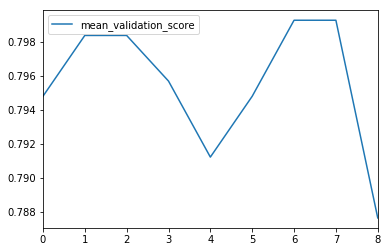

In [105]:
max_depth_explore = explore_grid([{"max_features": np.arange(1,10)}])
max_depth_explore.plot()

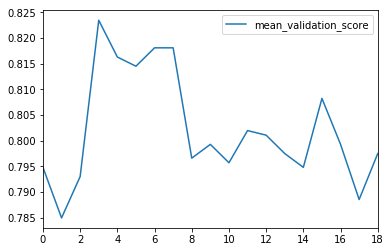

In [101]:
max_depth_explore = explore_grid([{"max_depth": np.arange(1,20)}])
max_depth_explore.plot()

### Grid Search
Your turn: Define feature space

In [106]:
param_grid = [{
    "max_depth": [],
    "max_features": []
}]


clf = RandomForestClassifier(n_jobs=-1, n_estimators = 10)

grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=4,
    scoring='accuracy')


grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 6, 7], 'max_features': [2, 4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

## Random Search
Your turn: Define feature space

In [107]:

param_dist = {"max_depth": ,
              "max_features":,

             }

clf = RandomForestClassifier(n_jobs=-1, n_estimators = 10)

# run randomized search
n_iter_search = 7
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   cv=4,
                                   n_iter=n_iter_search)
random_search.fit(X, y)


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=7, n_jobs=1,
          param_distributions={'max_depth': array([1, 2, 3, 4, 5, 6]), 'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

# Check the best Estimator

In [108]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=8, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [109]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=8, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

# Get all scores

In [110]:
rand_out = pd.DataFrame(random_search.cv_results_)
rand_out['which'] = 'rand'
grid_out = pd.DataFrame(grid_search.cv_results_)
grid_out['which'] = 'grid'
all_out = rand_out[['mean_test_score', 'mean_train_score','which']].append(grid_out[['mean_test_score', 'mean_train_score','which']])

In [111]:
all_out.sort_values('mean_train_score',ascending = False).head(10)

,mean_test_score,mean_train_score,which
17,0.816308,0.865283,grid
19,0.810036,0.864691,grid
18,0.813620,0.860806,grid
16,0.813620,0.860203,grid
1,0.709063,0.857564,rand
15,0.817204,0.856329,grid
14,0.819892,0.853635,grid
13,0.815412,0.852140,grid
12,0.818100,0.850949,grid
6,0.727342,0.849692,rand


# Holdout test on both best estimators

In [112]:
random_search.best_estimator_.score(X_test,y_test), grid_search.best_estimator_.score(X_test,y_test)

(0.84771573604060912, 0.84771573604060912)

# Question 1: 
1. Add one or two more hyper parameters
2. Time time the tuning
3. which is faster? which is more accurate?


# Question 2:
1. Choose a data set from [the UCI ML repo](http://archive.ics.uci.edu/ml/index.php)
2. Choose a model, folds to CV, loss function (rmse or accuracy, or others)
3. Tune model using one or both methods
4. Attempt to maximize your loss function